<a href="https://colab.research.google.com/github/janani92004/CODECLAUSE_TASK1/blob/main/codeclause_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing all important libraries and modules like pandas, sklearn,nltk,matplotlib, and seaborn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import nltk
#downloading nltk packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Training Accuracy: 0.95625
Testing Accuracy: 0.66

Classification Report on Testing Data:
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        94
           1       1.00      0.36      0.53       106

    accuracy                           0.66       200
   macro avg       0.79      0.68      0.63       200
weighted avg       0.80      0.66      0.62       200



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


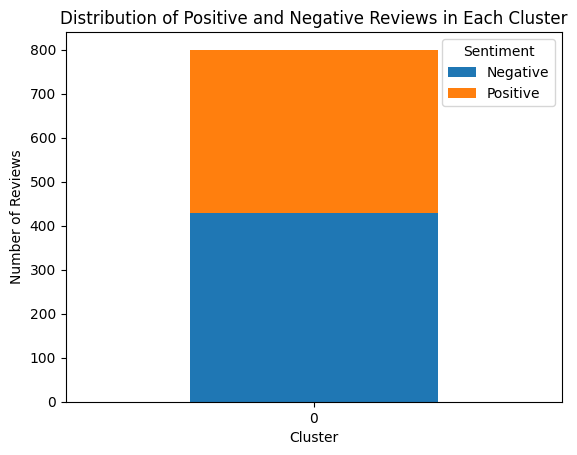

         label
cluster       
0        0.465


<ipython-input-8-013f38099b3f>:72: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df_train_with_clusters.groupby('cluster').mean()


In [8]:
# Loading of the dataset
df = pd.read_csv("/Train.csv")
df = df.head(1000)

# Preprocessing our data in the dataset 'Train'
def preprocess_text(text):
    # Converts the text in the column 'text' to lowercase
    text = text.lower()
    # Removes the punctuations in the column
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization of the words in the column
    tokens = word_tokenize(text)
    # Remove stopwords present in the column
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization(breaking down of a word to its root meaning)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join the tokens back into a string
    return ' '.join(tokens)

# Apply preprocessing to the text column
df['processed_text'] = df['text'].apply(preprocess_text)

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['label'], test_size=0.2, random_state=42)

# Vectorizing the text data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

# Training a Naive Bayes classifier for our dataset
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

# Making predictions on our dataset
y_pred_train = nb_classifier.predict(X_train_vectorized)
y_pred_test = nb_classifier.predict(vectorizer.transform(X_test))

# Evaluating the model
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report on Testing Data:")
print(classification_report(y_test, y_pred_test))

# Clustering the customers based on their movie sentiment using K-means clustering
#Number of clusters
k = 1
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train_vectorized)

# Adding  cluster labels to the original training dataset
# Creating a copy of the training data
df_train_with_clusters = df.loc[X_train.index].copy()
# Assigning cluster labels
df_train_with_clusters['cluster'] = kmeans.labels_

# Counting the number of positive and negative reviews in each cluster
cluster_counts = df_train_with_clusters.groupby(['cluster', 'label']).size().unstack(fill_value=0)

# Plotting the bar graph
cluster_counts.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Positive and Negative Reviews in Each Cluster')
plt.xticks(rotation=0)
plt.legend(title='Sentiment', labels=['Negative', 'Positive'])
plt.show()


# Analyzing cluster characteristics
cluster_means = df_train_with_clusters.groupby('cluster').mean()
print(cluster_means)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


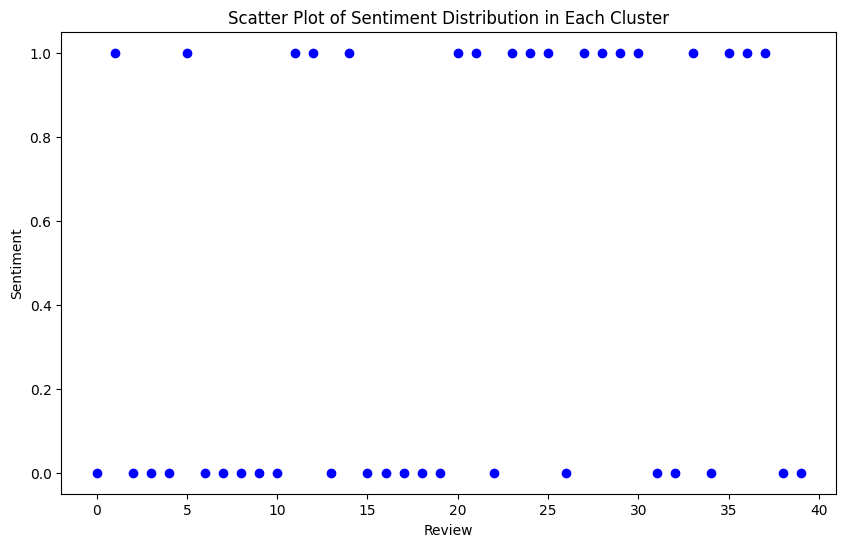

         label
cluster       
0          0.0
1          1.0
2          0.0
3          0.0
4          0.0
5          1.0
6          0.0
7          0.0
8          0.0
9          0.0
10         0.0
11         1.0
12         1.0
13         0.0
14         1.0
15         0.0
16         0.0
17         0.0
18         0.0
19         0.0
20         1.0
21         1.0
22         0.0
23         1.0
24         1.0
25         1.0
26         0.0
27         1.0
28         1.0
29         1.0
30         1.0
31         0.0
32         0.0
33         1.0
34         0.0
35         1.0
36         1.0
37         1.0
38         0.0
39         0.0


<ipython-input-23-851177f85b69>:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df_train_with_clusters.groupby('cluster').mean()


In [23]:

import matplotlib.pyplot as plt
import seaborn as sns

# Clustering customers based on movie sentiment
k = 40
# Number of clusters is 40
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train_vectorized)

# Adding cluster labels to the original training dataset
df_train_with_clusters = df.loc[X_train.index].copy()  # Creating a copy of the training data
df_train_with_clusters['cluster'] = kmeans.labels_  # Assigning cluster labels

# Counting the number of positive and negative reviews in each cluster
cluster_counts = df_train_with_clusters.groupby(['cluster', 'label']).size().unstack(fill_value=0)

# Plotting the scatter plot for our dataset
plt.figure(figsize=(10, 6))
for index, row in df_train_with_clusters.iterrows():
    plt.scatter(row['cluster'], row['label'], c='b', marker='o')  # Plotting each review individually
plt.xlabel('Review')
plt.ylabel('Sentiment')
plt.title('Scatter Plot of Sentiment Distribution in Each Cluster')
plt.show()




# Analyzing cluster characteristics
cluster_means = df_train_with_clusters.groupby('cluster').mean()
print(cluster_means)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-df6f3bb9f749>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_train_with_clusters, x='cluster', y='label', ci=None)


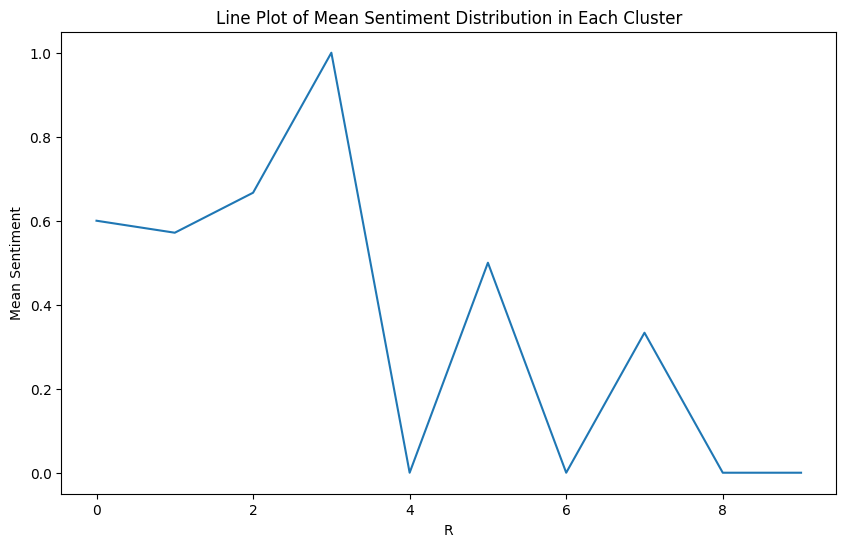

            label
cluster          
0        0.600000
1        0.571429
2        0.666667
3        1.000000
4        0.000000
5        0.500000
6        0.000000
7        0.333333
8        0.000000
9        0.000000


<ipython-input-21-df6f3bb9f749>:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df_train_with_clusters.groupby('cluster').mean()


In [21]:

import matplotlib.pyplot as plt
import seaborn as sns

# Clustering customers based on movie sentiment
k = 10
# Number of clusters is 10
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train_vectorized)

# Adding cluster labels to the original training dataset
df_train_with_clusters = df.loc[X_train.index].copy()  # Create a copy of the training data
df_train_with_clusters['cluster'] = kmeans.labels_  # Assign cluster labels

# Counting the number of positive and negative reviews in each cluster
cluster_counts = df_train_with_clusters.groupby(['cluster', 'label']).size().unstack(fill_value=0)
# Plotting the line plot for our dataset
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_train_with_clusters, x='cluster', y='label', ci=None)
plt.xlabel('Reviews')
plt.ylabel('Mean Sentiment')
plt.title('Line Plot of Mean Sentiment Distribution in Each Cluster')
plt.show()

# Analyzing cluster characteristics
cluster_means = df_train_with_clusters.groupby('cluster').mean()
print(cluster_means)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


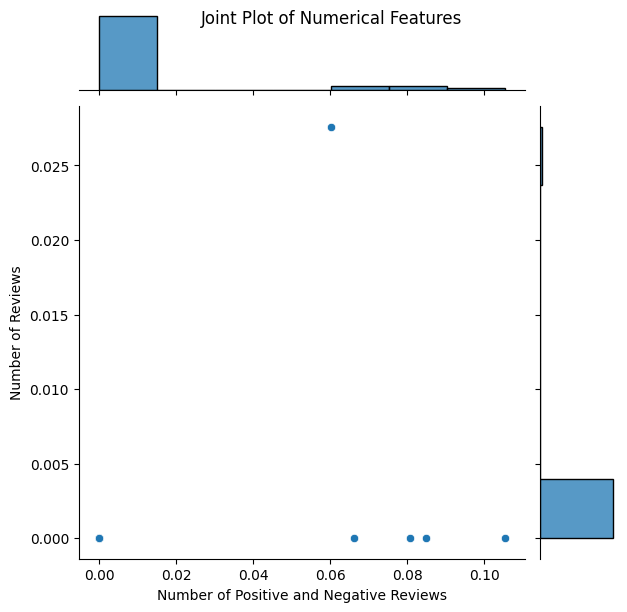

            label
cluster          
0        0.600000
1        0.571429
2        0.666667
3        1.000000
4        0.000000
5        0.500000
6        0.000000
7        0.333333
8        0.000000
9        0.000000


<ipython-input-20-22c16334e6cd>:62: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df_train_with_clusters.groupby('cluster').mean()


In [20]:
# Loading of the dataset
df = pd.read_csv("/Train.csv")
df = df.head(50)

# Preprocessing function
def preprocess_text(text):
    # Converts the text to lowercase
    text = text.lower()
    # Removes the punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a string
    return ' '.join(tokens)

# Apply preprocessing to the text column
df['processed_text'] = df['text'].apply(preprocess_text)

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['label'], test_size=0.2, random_state=42)

# Vectorizing the text data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

# Training a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

# Making predictions
y_pred_train = nb_classifier.predict(X_train_vectorized)
y_pred_test = nb_classifier.predict(vectorizer.transform(X_test))
# Clustering customers based on movie sentiment
k = 10
# Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train_vectorized)

# Add cluster labels to the original training dataset
df_train_with_clusters = df.loc[X_train.index].copy()  # Create a copy of the training data
df_train_with_clusters['cluster'] = kmeans.labels_  # Assign cluster labels

# Selecting two numerical features for joint plot
num_features = vectorizer.transform(df_train_with_clusters['processed_text']).toarray()
feature1 = num_features[:, 0]  # Choose the first numerical feature
feature2 = num_features[:, 1]  # Choose the second numerical feature

# Plotting the joint plot
sns.jointplot(x=feature1, y=feature2, kind='scatter')
plt.suptitle('Joint Plot of Numerical Features')
plt.xlabel('Number of Positive and Negative Reviews')
plt.ylabel('Number of Reviews')
plt.show()

# Analyzing cluster characteristics
cluster_means = df_train_with_clusters.groupby('cluster').mean()
print(cluster_means)